In [63]:
#https://thecleverprogrammer.com/2020/11/10/heart-disease-prediction-using-machine-learning/

In [38]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [39]:
df = pd.read_csv(r"C:\Users\Srivalli\OneDrive\Desktop\sem 5\ml\own proj\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [40]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


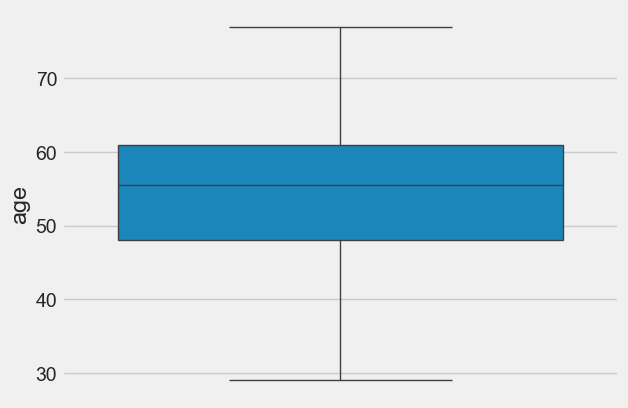

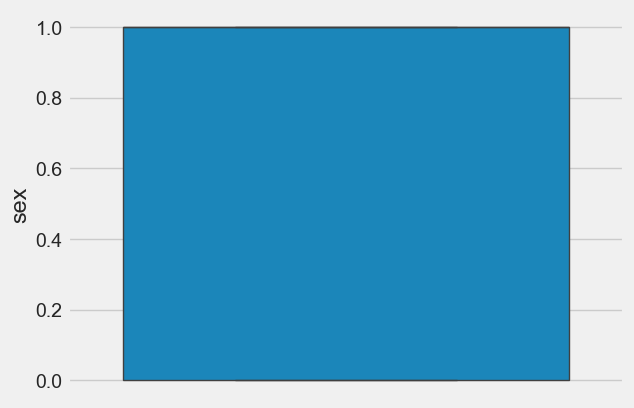

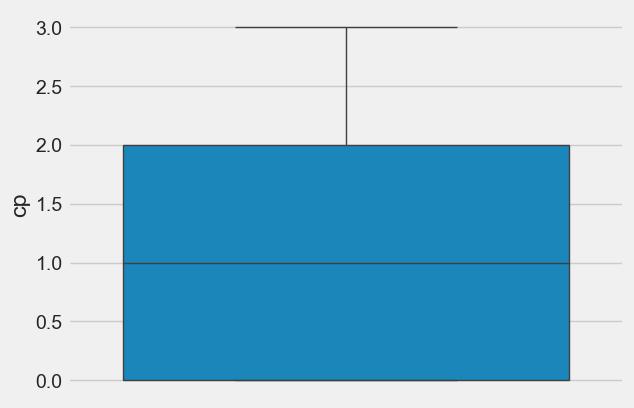

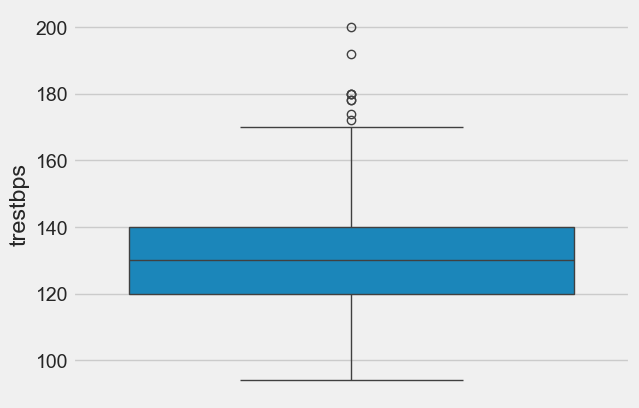

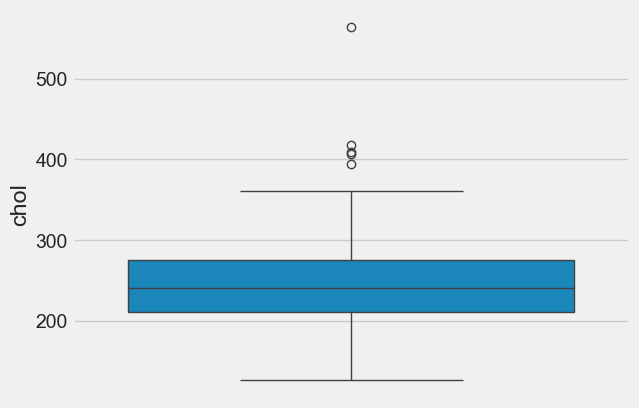

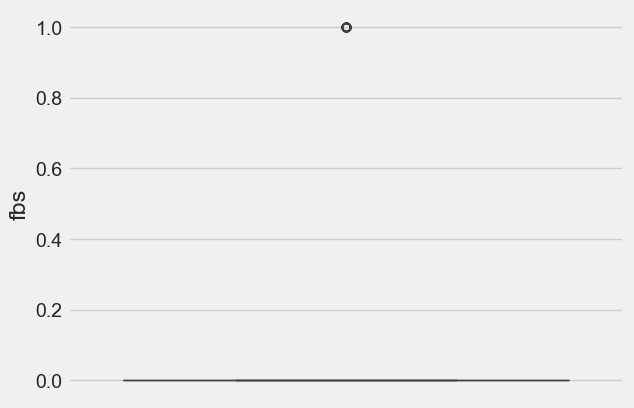

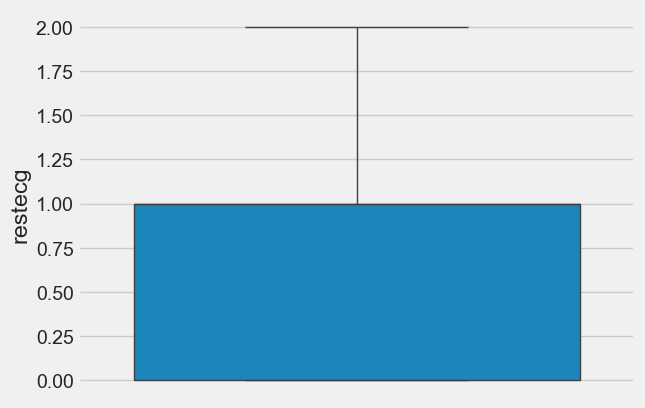

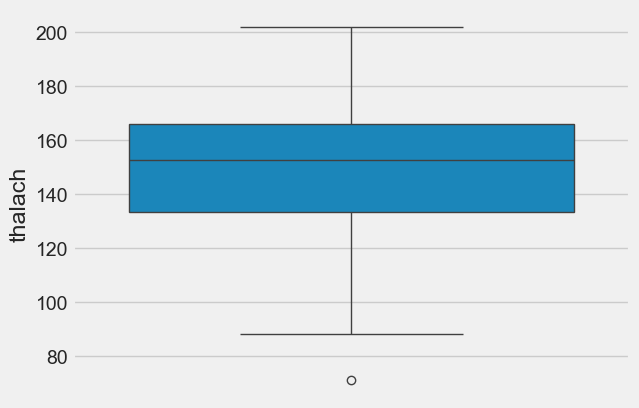

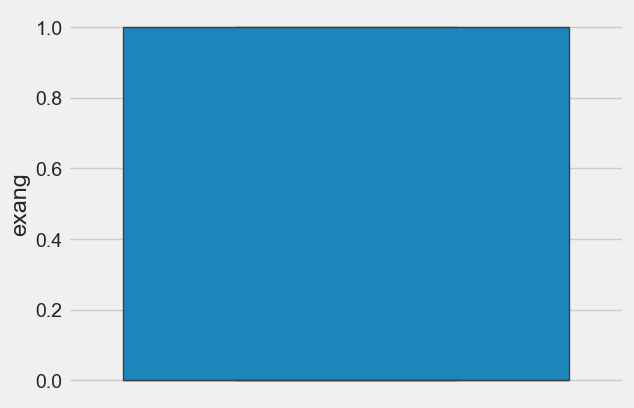

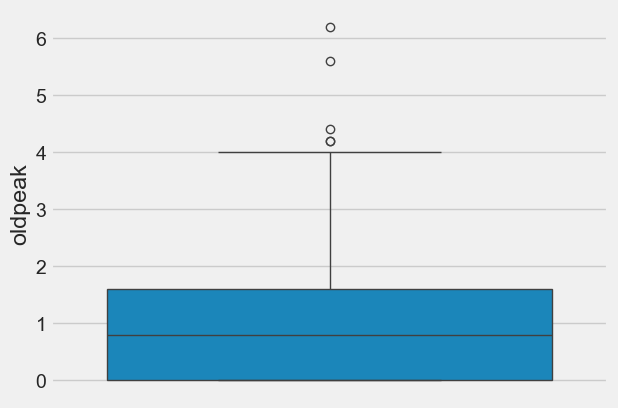

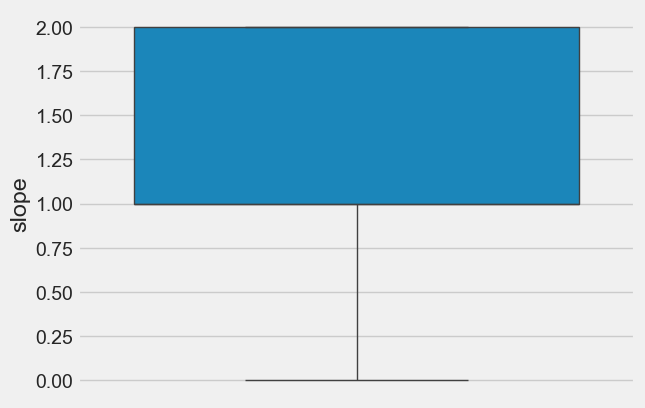

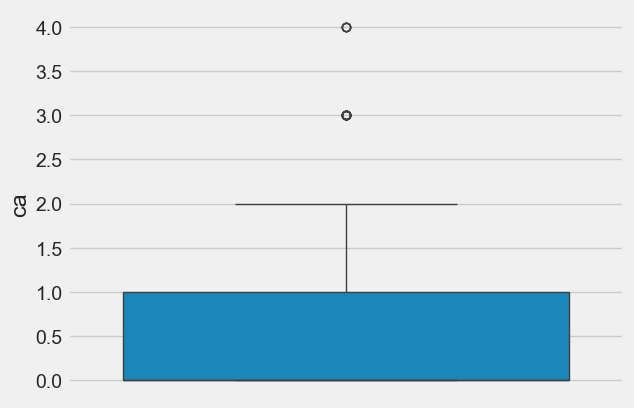

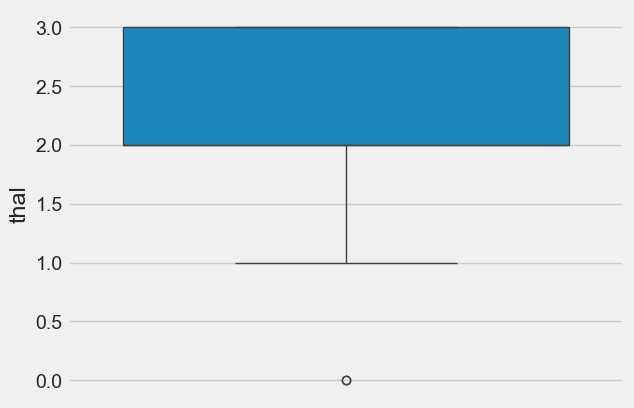

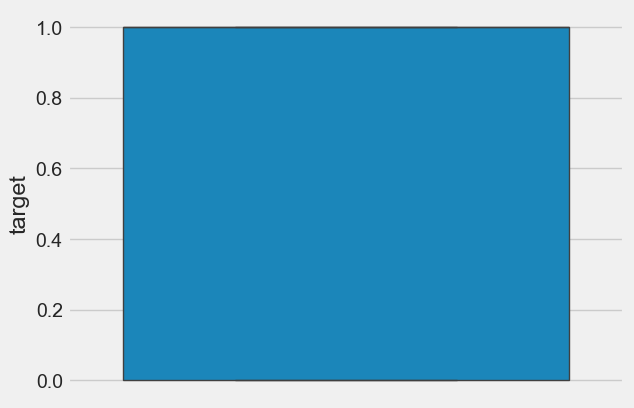

In [46]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(df[i])
    plt.show()

In [47]:
for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    df=df[(df[col]>=lower) & (df[col]<=upper)]

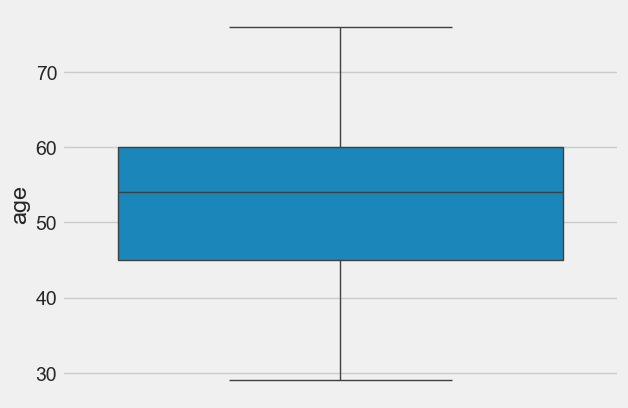

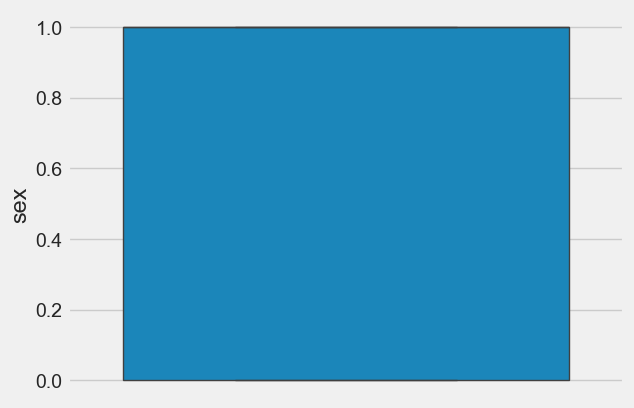

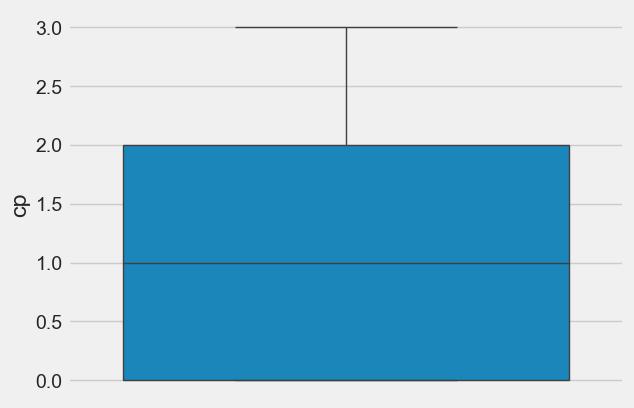

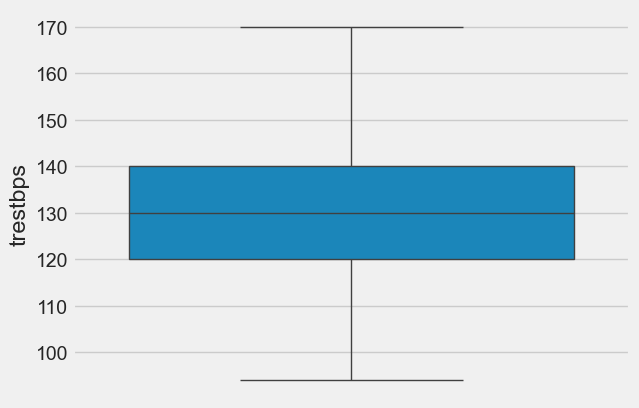

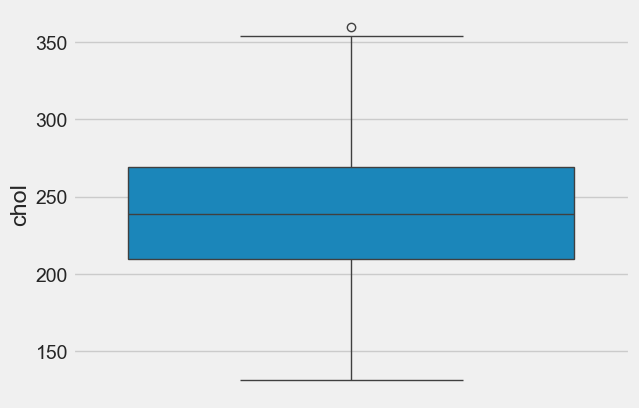

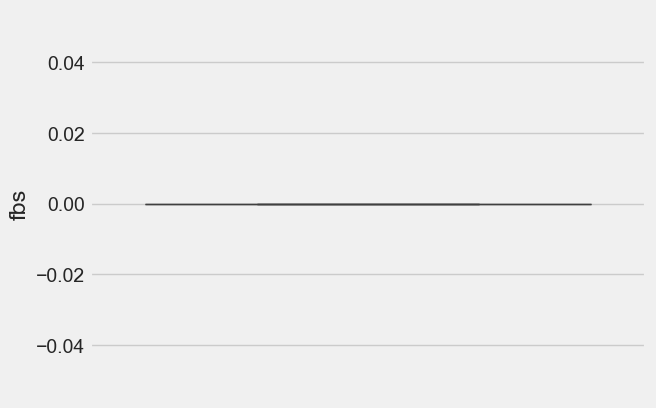

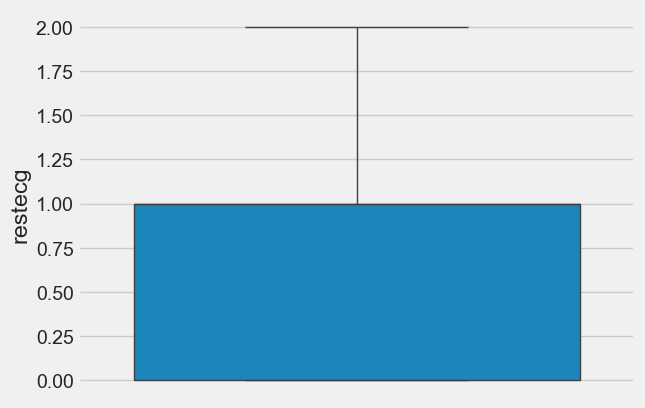

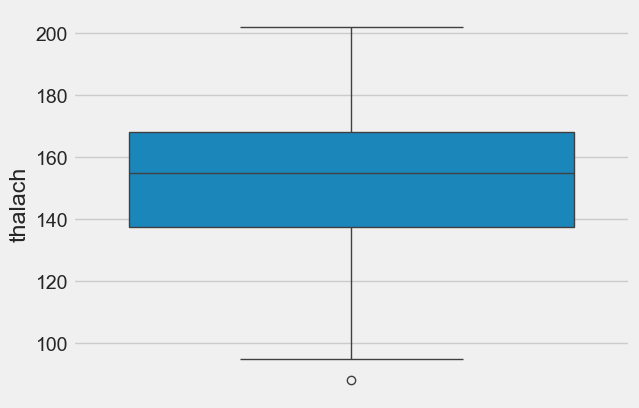

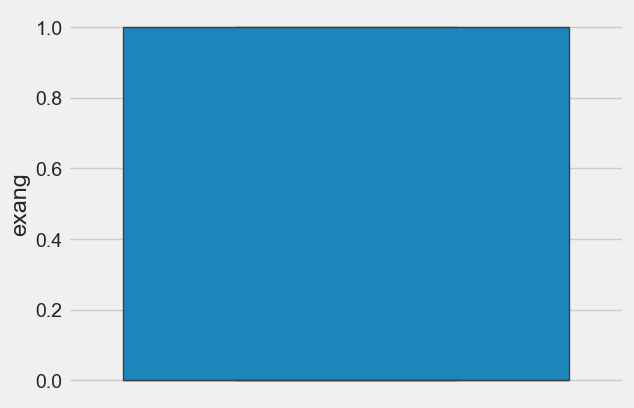

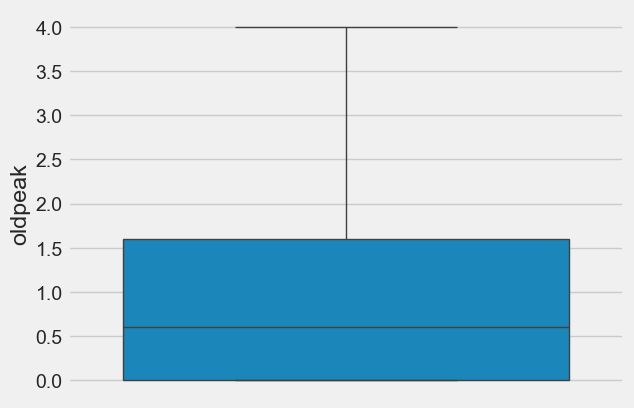

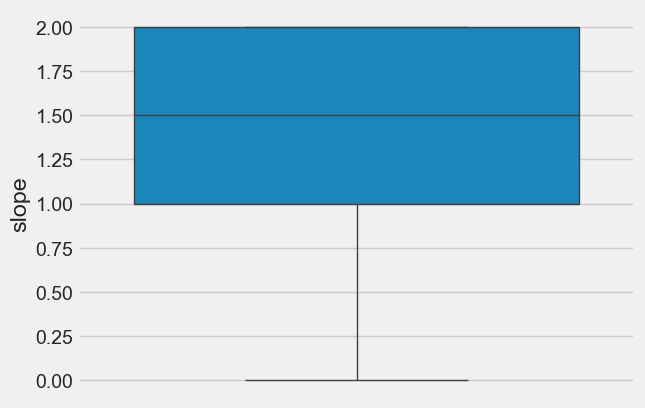

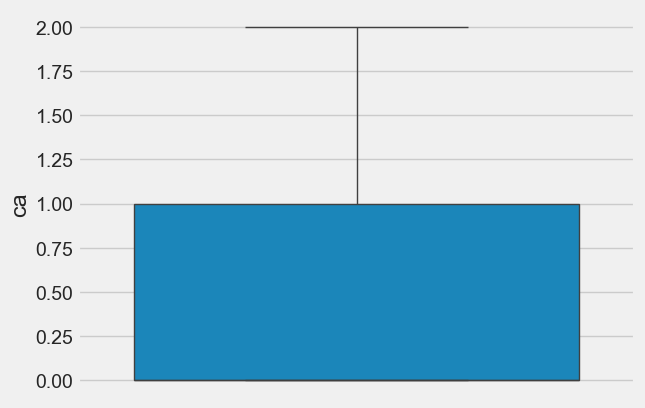

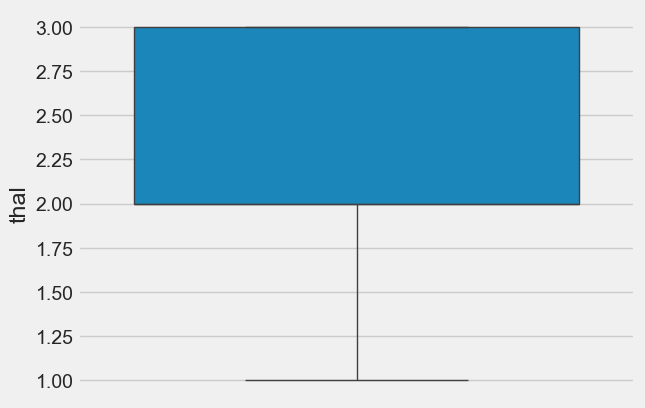

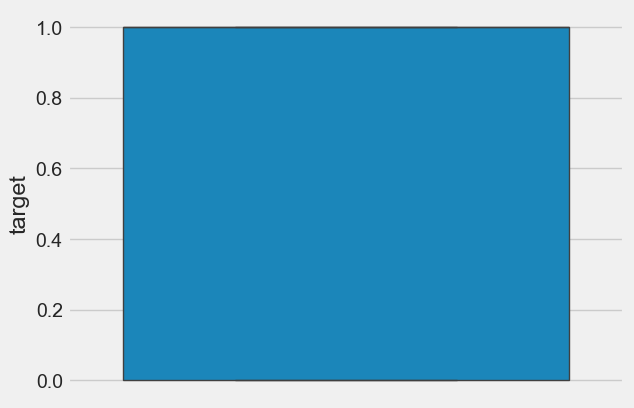

In [48]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(df[i])
    plt.show()

In [49]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [50]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.drop_duplicates(keep='first',inplace=True)

In [45]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='target'>

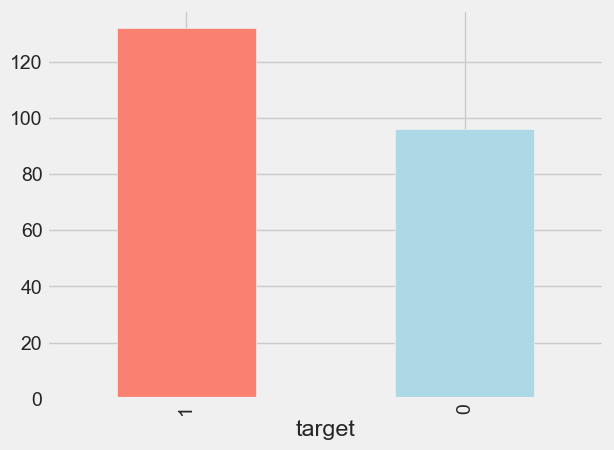

In [51]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [52]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [52 70 61 58 55 46 54 71 34 51 50 60 67 45 63 42 44 57 59 64 65 41 66 56
 48 29 37 47 62 53 76 43 40 39 49 35 38 74 68 69]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 145 148 100 160 120 122 112 118 140 124 106 104 135 130 129 150 138
 128 132 146 152 154 170 136 134 108 123 110 142  94 115 102 144 126 105
 155 156]
chol : [212 174 203 248 289 249 286 149 210 308 266 244 185 223 208 252 209 307
 233 169 131 269 196 231 213 271 263 229 360 258 330 342 226 278 241 193
 245 232 204 299 288 315 215 326 207 177 257 187 201 220 268 267 236 303
 282 197 309 186 275 281 206 335 254 295 260 240 302 192 256 235 274 234
 182 167 172 321 300 199 157 222 184 354 160 247 239 246 211 293 180 250
 221 318 200 227 243 311 261 242 306 219 353 198 183 224 228 313 340 259
 270 325 294 264 276 214 273 253 230 175 284 218 265 305 168 290 277 262
 195 205 166 141 255 188]
fbs : [0]
restecg : [1 0 2]
thalach : [168 125 161 122 145 144 116 192 142 109 162 155 148 172 173 146 179 115
 112 163 147 182 105 1

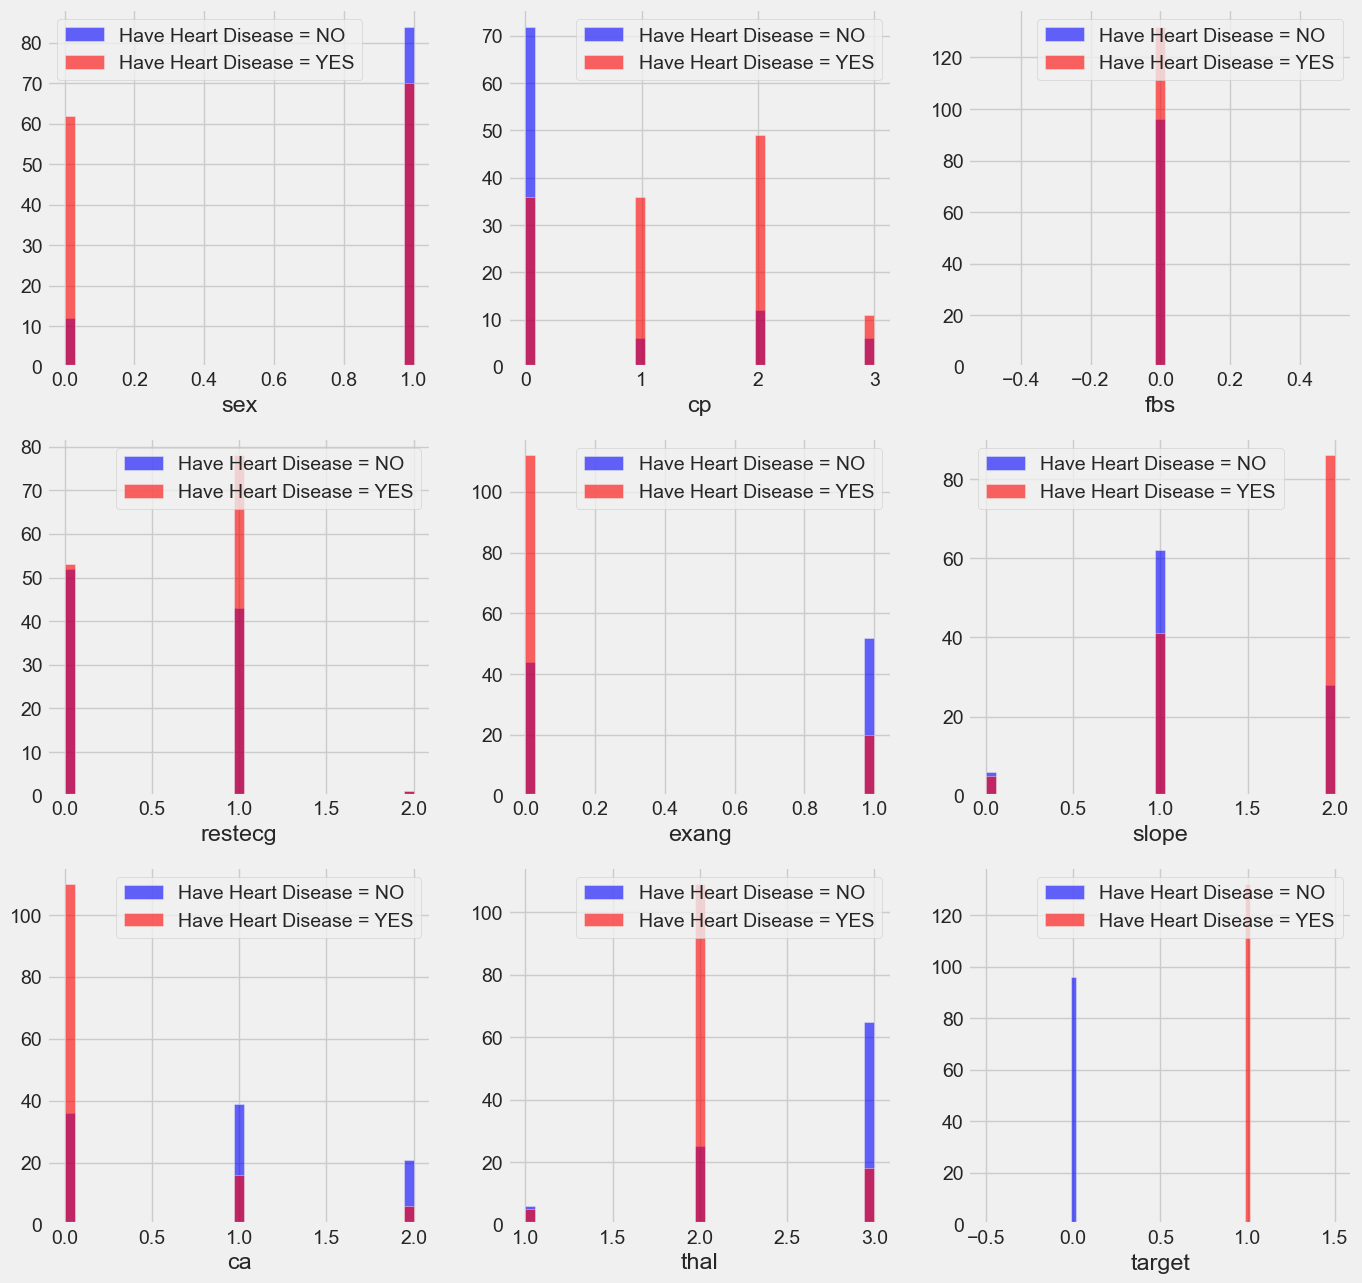

In [53]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

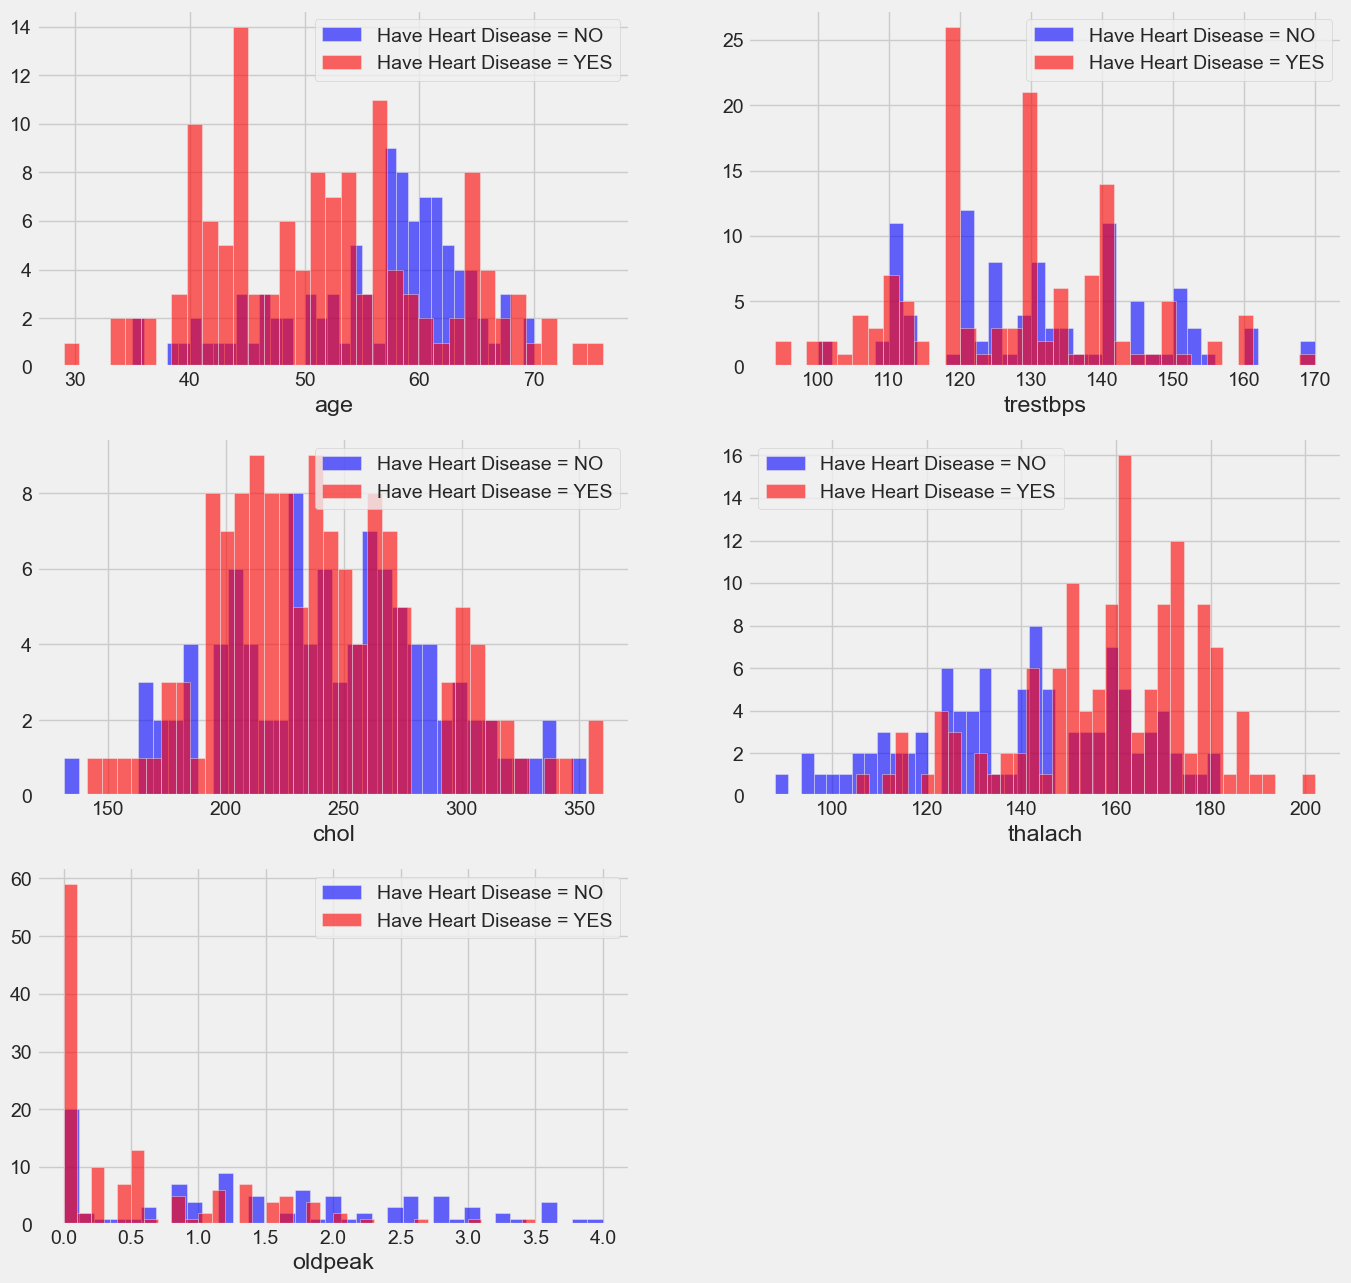

In [54]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

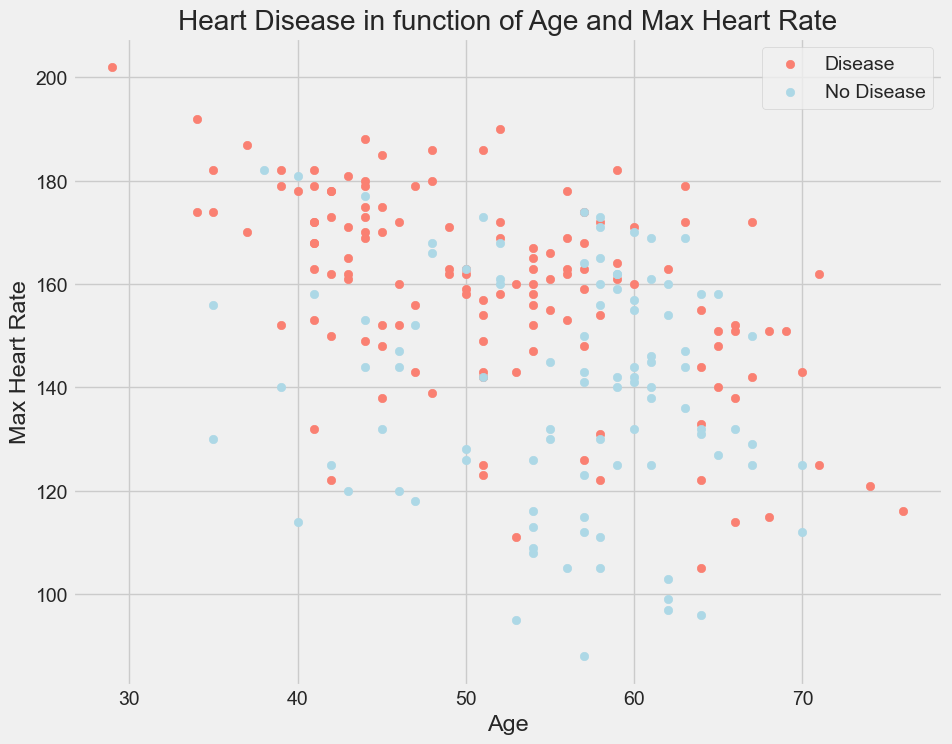

In [55]:
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

(14.5, -0.5)

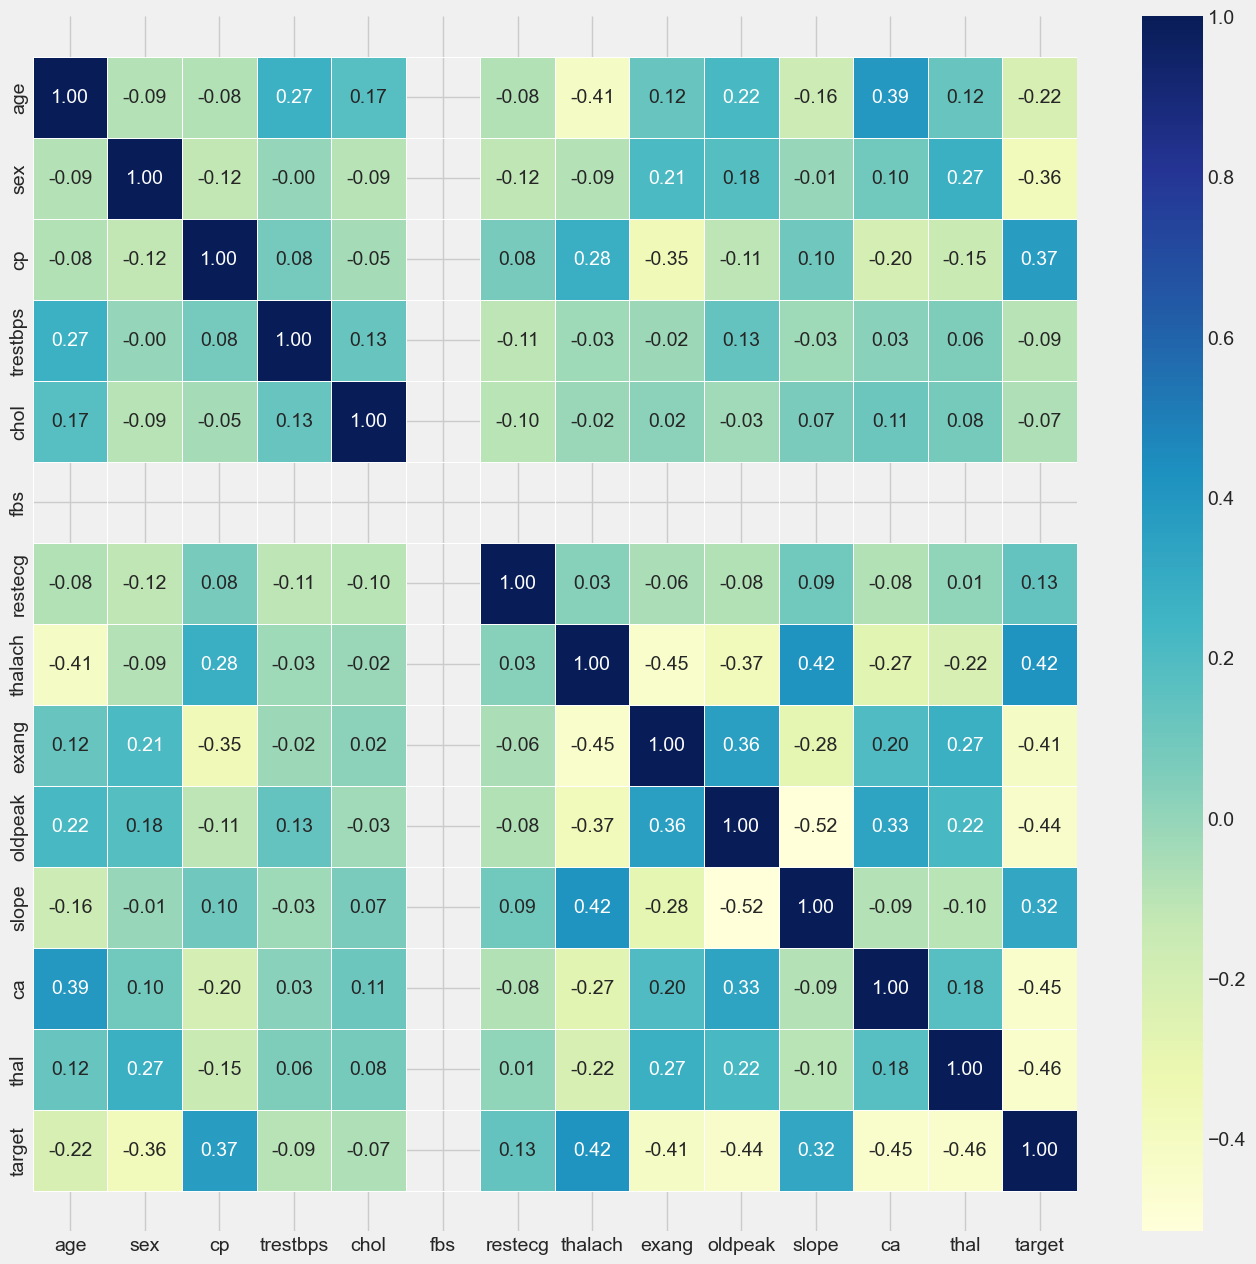

In [56]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

C:\Users\Srivalli\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Srivalli\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: title={'center': 'Correlation with target'}>

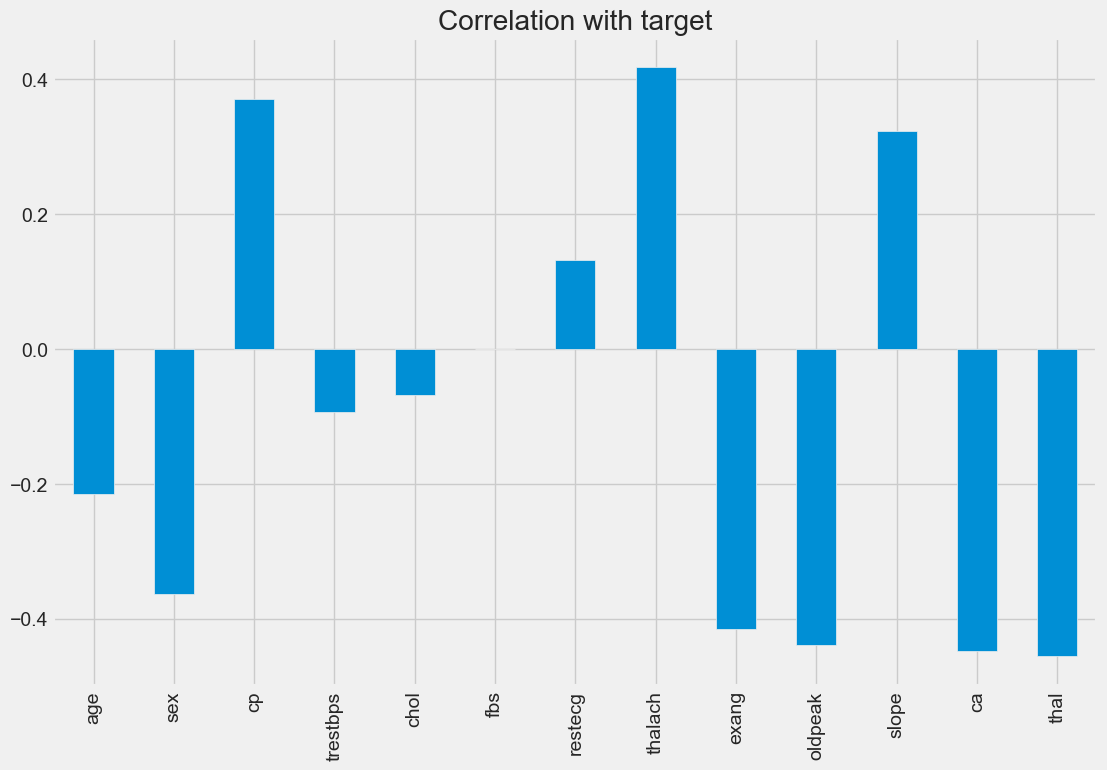

In [57]:

df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [58]:

categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [60]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [61]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.16%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.86      0.86       0.86          0.86
recall     0.79  0.91      0.86       0.85          0.86
f1-score   0.83  0.88      0.86       0.86          0.86
support   67.00 92.00      0.86     159.00        159.00
_______________________________________________
Confusion Matrix: 
 [[53 14]
 [ 8 84]]

Test Result:
Accuracy Score: 84.06%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.78  0.89      0.84       0.84          0.85
recall     0.86  0.82      0.84       0.84          0.84
f1-score   0.82  0.86      0.84       0.84          0.84
support   29.00 40.00      0.84      69.00         69.00
_______________________________________________
Confusion Matrix: 
 [[25  4]
 [ 7 33]]



In [62]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.16,84.06
